In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import embedders

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geoopt

# Decorator

/Users/phil/miniforge3/lib/python3.10/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


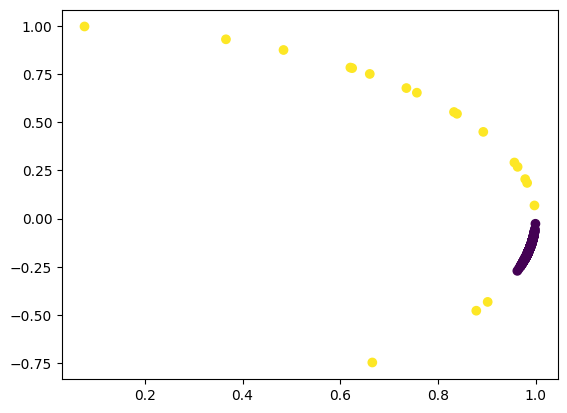

In [3]:
# Decorator: does ReLU work?

sph = embedders.manifolds.ProductManifold(signature=[(1, 1)])
X, y = embedders.gaussian_mixture.gaussian_mixture(pm=sph)

# Plot X points originally
X_np = X.detach().numpy()
y_np = y.detach().numpy()
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np)

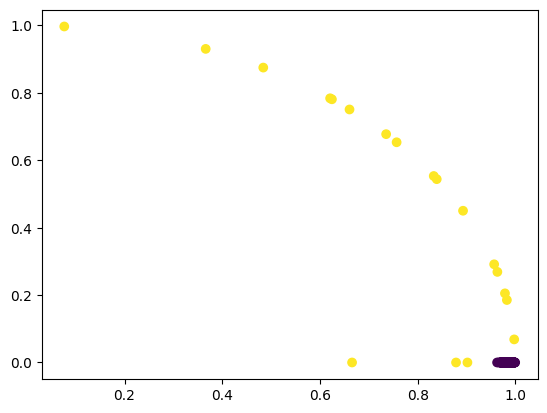

False


In [4]:
# ReLU normal

relu = torch.nn.ReLU()

X_relu = relu(X)
X_relu_np = X_relu.detach().numpy()

# Plot X points after ReLU
plt.scatter(X_relu_np[:, 0], X_relu_np[:, 1], c=y_np)
plt.show()

print(sph.manifold.check_point_on_manifold(X_relu))

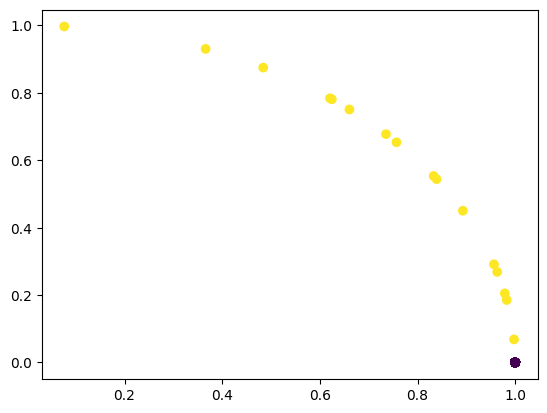

True


In [5]:
# ReLU with manifold-apply


@sph.apply
def relu(x):
    return torch.relu(x)


X_relu = relu(X)
X_relu_np = X_relu.detach().numpy()

# Plot X points after ReLU
plt.scatter(X_relu_np[:, 0], X_relu_np[:, 1], c=y_np)
plt.show()

print(sph.manifold.check_point_on_manifold(X_relu))

In [6]:
# Verify it works on a product manifold too

M = embedders.manifolds.ProductManifold(signature=[(2, 2), (0, 2), (-2, 2)])
X, y = embedders.gaussian_mixture.gaussian_mixture(pm=M)

In [7]:
@M.apply
def relu(x):
    return torch.relu(x)


X_relu = relu(X)

print((X_relu < 0).any())

tensor(True)


# How to make stereographic projections?

In [8]:
M = embedders.manifolds.ProductManifold(signature=[(2, 2), (0, 2), (-2, 2)])
S, E, H = M.P

X, y = embedders.gaussian_mixture.gaussian_mixture(pm=M)
X_S, X_E, X_H = M.factorize(X)
y_np = y.detach().numpy()

In [9]:
# Sanity check
print(S.type, E.type, H.type)

S E H


In [10]:
# A spherical stereographic manifold

D = geoopt.manifolds.Stereographic(2)

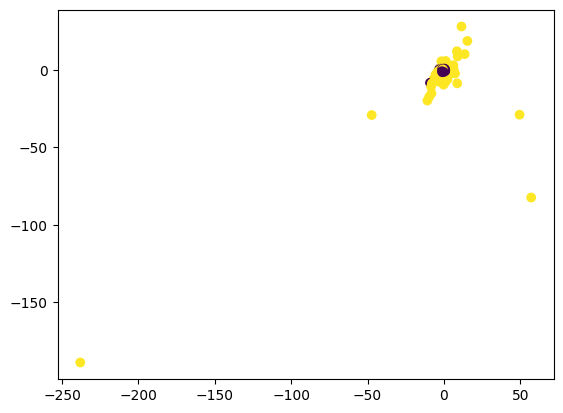

In [12]:
# Try to convert S to kappa-stereographic model using geoopt

# D = S.to_stereographic()
# D = embedders.manifolds.Manifold(curvature=1, dim=1, stereographic=True)
# P = embedders.manifolds.Manifold(curvature=-1, dim=1, stereographic=True)

D, X_D = S.stereographic(X_S)

# Plot new X
X_D_np = X_D.detach().numpy()

plt.scatter(X_D_np[:, 0], X_D_np[:, 1], c=y.detach().numpy())
plt.show()

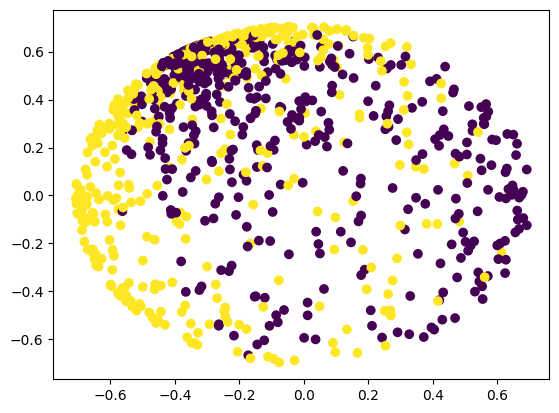

In [15]:
# Try to convert H to kappa-stereographic model using geoopt

P, X_P = H.stereographic(X_H)

# Plot new X
X_P_np = X_P.detach().numpy()

plt.scatter(X_P_np[:, 0], X_P_np[:, 1], c=y.detach().numpy())
plt.show()

In [19]:
# Verify that mu0 becomes 0 in stereographic projection

_, mu0_P = H.stereographic(H.mu0)
print(mu0_P)

_, mu0_D = S.stereographic(S.mu0)
print(mu0_D)

tensor([[0., 0.]])
tensor([[0., 0.]])


# Stereographic product manifold

In [50]:
# Verify that we can initialize a stereographic product manifold
# Verify that we can convert to a stereo product manifold
# Verify projection matrix becomes identity matrix

import embedders.manifolds


M = embedders.manifolds.ProductManifold(signature=[(2, 2), (0, 2), (-2, 2)])
X, y = embedders.gaussian_mixture.gaussian_mixture(pm=M)

In [54]:
M_stereo, X_stereo = M.stereographic(X)

In [52]:
X_stereo

tensor([[ 0.8822, -0.8913,  0.6422,  3.2698,  0.5934,  0.3838],
        [-0.4060, -0.8125, -2.1625,  0.5253, -0.5140, -0.4160],
        [ 0.6936, -0.0564,  0.9147, -0.7366, -0.1943, -0.3989],
        ...,
        [-0.0869, -0.8686, -1.6935,  1.0487, -0.4835, -0.4502],
        [24.4561,  0.8880, -4.5243,  0.6087,  0.5169,  0.4045],
        [ 0.5425,  0.1812, -5.6898,  0.8976,  0.5311,  0.3585]])

In [53]:
M_stereo.factorize(X_stereo)

[tensor([[ 0.8822, -0.8913],
         [-0.4060, -0.8125],
         [ 0.6936, -0.0564],
         ...,
         [-0.0869, -0.8686],
         [24.4561,  0.8880],
         [ 0.5425,  0.1812]]),
 tensor([[ 0.6422,  3.2698],
         [-2.1625,  0.5253],
         [ 0.9147, -0.7366],
         ...,
         [-1.6935,  1.0487],
         [-4.5243,  0.6087],
         [-5.6898,  0.8976]]),
 tensor([[ 0.5934,  0.3838],
         [-0.5140, -0.4160],
         [-0.1943, -0.3989],
         ...,
         [-0.4835, -0.4502],
         [ 0.5169,  0.4045],
         [ 0.5311,  0.3585]])]